# <center>Tugas Besar Individu Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Deaz Setyo Nugroho - 1301210248

<b>Url presentasi</b>
https://youtu.be/lcLTVUJRyyw

Fungsi yang dikerjakan

Tulis fungsi di sini
- F2 :

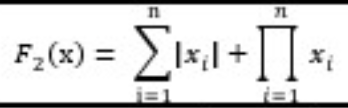

Range yang digunakan
- Range: [-20, 20]

Algoritma yang digunakan
- GWO (Grey Wolf Optimization)
- RAO3



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
# Tuliskan fungsi di sini (untuk evaluasi fitness function)
def eval(x1, x2):
  return abs(x1) + abs(x2) + abs(x1) * abs(x2)


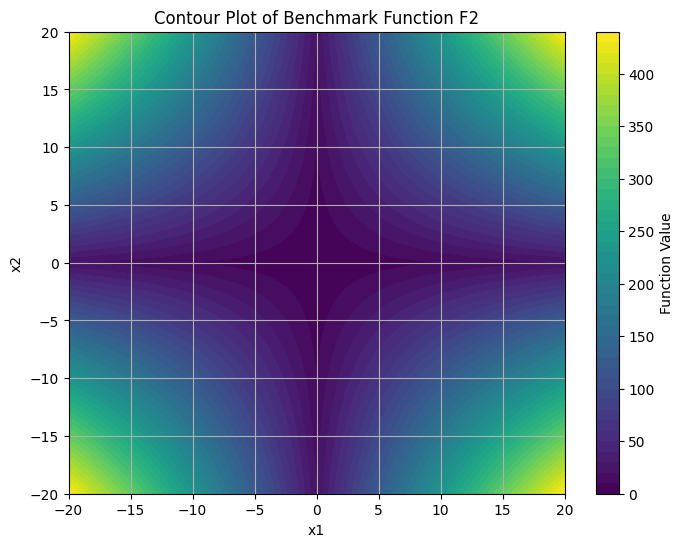

In [ ]:
# Plot contour plot di sini berdasarkan range yang diberikan
x_range = np.linspace(-20, 20, 250)
y_range = np.linspace(-20, 20, 250)
X, Y = np.meshgrid(x_range, y_range)
Z = np.array([[eval(x, y) for x in x_range] for y in y_range])

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Function Value')
plt.title('Contour Plot of Benchmark Function F2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

#### Latar Belakang algoritma 1
Algoritma Grey Wolf Optimization (GWO) adalah algoritma optimasi berbasis metaheuristik yang terinspirasi oleh perilaku berburu dan hierarki sosial dari serigala abu-abu (grey wolves). Algoritma ini mencoba meniru teknik berburu yang dilakukan oleh serigala dalam kelompok, di mana serigala alpha (𝛼) dianggap sebagai pemimpin, diikuti oleh serigala beta (𝛽) dan serigala delta (𝛿). Sisanya adalah serigala omega (𝜔), yang mengikuti tiga serigala utama tersebut.

**Intuisi dan Cara Kerja:**




1.   **Inisialisasi Populasi:** Sekelompok serigala diinisialisasi secara acak dalam ruang pencarian.
2.   **Evaluasi Fitness:** Setiap serigala dievaluasi berdasarkan fungsi objektif (fitness function).
1.   **Identifikasi Alpha, Beta, dan Delta:** Serigala dengan nilai fitness terbaik dianggap sebagai alpha, kedua terbaik sebagai beta, dan ketiga terbaik sebagai delta.
2.   **Perbarui Posisi:** Serigala lainnya (omega) memperbarui posisinya berdasarkan posisi alpha, beta, dan delta menggunakan persamaan tertentu yang melibatkan parameter
𝑎, 𝐴, dan 𝐶.
1.   **Parameter Update:** Parameter
𝑎, 𝐴, dan 𝐶 diperbarui secara bertahap selama iterasi untuk memastikan eksplorasi dan eksploitasi yang efektif.
2.   **Iterasi:** Langkah-langkah di atas diulang sampai kondisi terminasi (seperti jumlah iterasi maksimum) tercapai.


**Parameter:**
*   **Parameter a:** Dimulai dengan nilai 2 dan secara bertahap menurun ke 0 selama iterasi. Ini mengontrol keseimbangan antara eksplorasi (mencari di area yang luas) dan eksploitasi (mencari di sekitar solusi terbaik).
*   **Parameter A:** Vektor A bervariasi dengan nilai a dan digunakan untuk mengontrol pergerakan serigala dalam ruang pencarian.   
A = 2a * r1 - a, di mana r1 adalah bilangan acak antara 0 dan 1.
*   **Parameter C:** Vektor C digunakan untuk memperhitungkan jarak serigala dari mangsa (solusi optimal). C = 2 * r2, di mana r2 adalah bilangan acak antara 0 dan 1.



In [ ]:
# Algoritma 1

# Inisialisasi populasi
def inisialisasi_populasi(populasi_size, dimensi, rentang):
    return np.random.uniform(rentang[0], rentang[1], (populasi_size, dimensi))

# Hitung fitness
def hitung_fitness(populasi):
    return np.array([eval(individu[0], individu[1]) for individu in populasi])

# Perbarui posisi agen pencarian saat ini
def perbarui_posisi(populasi, Xalpha, Xbeta, Xdelta, a, A, C, rentang):
    for i in range(len(populasi)):
        for j in range(len(populasi[i])):
            Dalpha = abs(C * Xalpha[j] - populasi[i][j])
            Dbeta = abs(C * Xbeta[j] - populasi[i][j])
            Ddelta = abs(C * Xdelta[j] - populasi[i][j])
            X1 = Xalpha[j] - A[0] * Dalpha
            X2 = Xbeta[j] - A[1] * Dbeta
            X3 = Xdelta[j] - A[2] * Ddelta
            populasi[i][j] = (X1 + X2 + X3) / 3
            # Memastikan nilai dalam rentang yang diizinkan
            populasi[i][j] = max(min(populasi[i][j], rentang[1]), rentang[0])

# Perbarui a, A, dan C
def perbarui_parameter(a, A, C, iterasi_max, iterasi):
    a_new = 2 - iterasi * (2 / iterasi_max)
    A_new = np.array([2 * a_new * np.random.random() - a_new for _ in range(3)])
    C_new = 2 * np.random.random()
    return a_new, A_new, C_new

# Grey Wolf Optimization (GWO)
def gwo(populasi_size, dimensi, rentang, iterasi_max):
    populasi = inisialisasi_populasi(populasi_size, dimensi, rentang)
    a = 2
    A = np.array([2 * a * np.random.random() - a for _ in range(3)])
    C = 2 * np.random.random()

    all_populations = [populasi.copy()]

    for t in range(iterasi_max):
        fitness = hitung_fitness(populasi)
        Xalpha_idx = np.argmin(fitness)
        Xalpha = populasi[Xalpha_idx]
        fitness[Xalpha_idx] = np.inf
        Xbeta_idx = np.argmin(fitness)
        Xbeta = populasi[Xbeta_idx]
        fitness[Xbeta_idx] = np.inf
        Xdelta_idx = np.argmin(fitness)
        Xdelta = populasi[Xdelta_idx]

        perbarui_posisi(populasi, Xalpha, Xbeta, Xdelta, a, A, C, rentang)
        a, A, C = perbarui_parameter(a, A, C, iterasi_max, t)

        # Print best fitness
        best_fitness = min(hitung_fitness(populasi))
        print(f"iteration {t+1}, best fitness: {best_fitness:.20f}")
        all_populations.append(populasi.copy())

    return Xalpha, all_populations



#### Latar Belakang algoritma 2
Algoritma Rao-3 adalah algoritma optimasi metaheuristik yang terinspirasi oleh sifat-sifat adaptif dari populasi agen dalam mencari solusi optimal. Algoritma ini bekerja dengan menggabungkan kandidat solusi yang ada untuk menemukan solusi yang lebih baik melalui serangkaian iterasi. Pada setiap iterasi, kandidat solusi diperbarui berdasarkan posisi kandidat terbaik, terburuk, dan kandidat acak lainnya dalam populasi saat ini. Proses ini diulang hingga tercapai jumlah iterasi maksimum atau ditemukan solusi optimal.

**Cara kerja Rao3:**


*   Inisialisasi populasi acak dalam rentang yang ditentukan.
*   Evaluasi kebugaran (fitness) setiap kandidat solusi.
*   Identifikasi kandidat terbaik dan terburuk dalam populasi.
*   Perbarui kandidat solusi lainnya berdasarkan kandidat terbaik, terburuk, dan kandidat acak yang berbeda.
*   Evaluasi kembali kebugaran kandidat solusi yang diperbarui dan perbarui populasi.
*   Ulangi proses hingga mencapai iterasi maksimum.

In [ ]:
# Algoritma 2

# Inisialisasi populasi
def inisialisasi_populasi(populasi_size, dimensi, rentang):
    return np.random.uniform(rentang[0], rentang[1], (populasi_size, dimensi))

# Hitung fitness
def hitung_fitness(populasi):
    return np.array([eval(individu[0], individu[1]) for individu in populasi])

def update_candidate(x_ki, x_best_i, x_worst_i, x_k_i, x_l_i, r1, r2, lb, ub):
    # Menggunakan persamaan RAO-3 untuk memperbarui kandidat solusi
    new_value = x_ki + r1 * (x_best_i - np.abs(x_worst_i)) + r2 * (np.abs(x_k_i) - x_l_i)
    return np.clip(new_value, lb, ub)

def rao3(populasi_size, dimensi, rentang, max_iterasi):
    # Inisialisasi populasi
    population = inisialisasi_populasi(populasi_size, dimensi, rentang)

    # for plot
    RAO3_plot = [population.copy()]

    for generation in range(max_iterasi):
        # Evaluasi kebugaran
        fitness_values = hitung_fitness(population)

        # Menemukan kandidat terbaik dan terburuk
        best_idx = np.argmin(fitness_values)  # indeks dari kandidat terbaik
        worst_idx = np.argmax(fitness_values)  # indeks dari kandidat terburuk
        x_best = population[best_idx]  # kandidat terbaik
        x_worst = population[worst_idx]  # kandidat terburuk

        # Perbarui setiap kandidat solusi
        new_population = np.copy(population)
        for i in range(populasi_size):
            if i == best_idx or i == worst_idx:
                continue  # Lewati kandidat terbaik dan terburuk

            r1 = np.random.rand(dimensi)  # vektor acak r1
            r2 = np.random.rand(dimensi)  # vektor acak r2
            l = np.random.choice(np.delete(np.arange(populasi_size), i))  # pilih kandidat acak l yang berbeda dari i

            new_candidate = np.copy(population[i])
            for j in range(dimensi):
                # Hitung kandidat baru menggunakan persamaan RAO-3
                new_candidate[j] = update_candidate(population[i, j], x_best[j], x_worst[j], population[i, j], population[l, j], r1[j], r2[j], rentang[0], rentang[1])

            if eval(new_candidate[0], new_candidate[1]) < eval(population[i, 0], population[i, 1]):
                new_population[i] = new_candidate  # Perbarui kandidat jika kebugarannya lebih baik

        population = new_population  # Ganti populasi lama dengan populasi baru

        RAO3_plot.append(population.copy())

    # Evaluasi akhir untuk menemukan solusi terbaik
    fitness_values = hitung_fitness(population)
    best_idx = np.argmin(fitness_values)
    return population[best_idx], fitness_values[best_idx], RAO3_plot


#### Running algortima 1
**Pemilihan Parameter:**
*   **Jumlah Iterasi** (𝑖𝑡𝑒𝑟𝑎𝑠𝑖_𝑚𝑎𝑥): Dalam kode ini, jumlah iterasi ditetapkan sebesar 100. Jumlah ini dipilih untuk memberikan algoritma cukup waktu untuk melakukan eksplorasi dan eksploitasi dalam ruang pencarian. Jumlah iterasi yang lebih besar mungkin memberikan hasil yang lebih baik, tetapi juga memerlukan waktu komputasi yang lebih lama.
*   **Ukuran Populasi** (𝑝𝑜𝑝𝑢𝑙𝑎𝑠𝑖_𝑠𝑖𝑧𝑒): Ukuran populasi diatur sebesar 30. Pilihan ini didasarkan pada keseimbangan antara keragaman populasi dan waktu komputasi. Populasi yang lebih besar dapat memberikan keragaman yang lebih baik tetapi membutuhkan waktu komputasi yang lebih lama.
*   **Dimensi** (𝑑𝑖𝑚𝑒𝑛𝑠𝑖): Dalam kasus ini, dimensi ruang pencarian diatur menjadi 2, yang sesuai dengan dua variabel keputusan (
𝑥1 dan 𝑥2) dari fungsi objektif F2.
*   **Rentang Pencarian** (𝑟𝑒𝑛𝑡𝑎𝑛𝑔): Rentang pencarian diatur dari -20 hingga 20. Ini memberikan batasan pada ruang pencarian yang masuk akal untuk fungsi F2 yang digunakan.

In [ ]:
# Run algoritma 1
# Parameter algoritma
populasi_size = 30
dimensi = 2
rentang = [-20, 20]
iterasi_max = 100

#Run algoritma 1
solusi_gwo, all_populations = gwo(populasi_size, dimensi, rentang, iterasi_max)
print("Solusi terbaik dengan GWO:", solusi_gwo)
print("Fitness Terbaik:", eval(solusi_gwo[0], solusi_gwo[1]))

iteration 1, best fitness: 3.07014070594576837792
iteration 2, best fitness: 1.22946267113221141543
iteration 3, best fitness: 0.83389135860957386281
iteration 4, best fitness: 1.42209271521729574417
iteration 5, best fitness: 0.98794762003066882716
iteration 6, best fitness: 1.06210890186318840378
iteration 7, best fitness: 1.07470710821985382388
iteration 8, best fitness: 0.84599128670001122465
iteration 9, best fitness: 0.66623059627660441429
iteration 10, best fitness: 0.68628274250266729783
iteration 11, best fitness: 0.49765799564181817383
iteration 12, best fitness: 0.08220538283685101255
iteration 13, best fitness: 0.12139768027149101803
iteration 14, best fitness: 0.13362697535458173403
iteration 15, best fitness: 0.07837299338822745209
iteration 16, best fitness: 0.07859006663959056116
iteration 17, best fitness: 0.03580266874239117214
iteration 18, best fitness: 0.05256427801151426077
iteration 19, best fitness: 0.03873025273441504240
iteration 20, best fitness: 0.0442622211

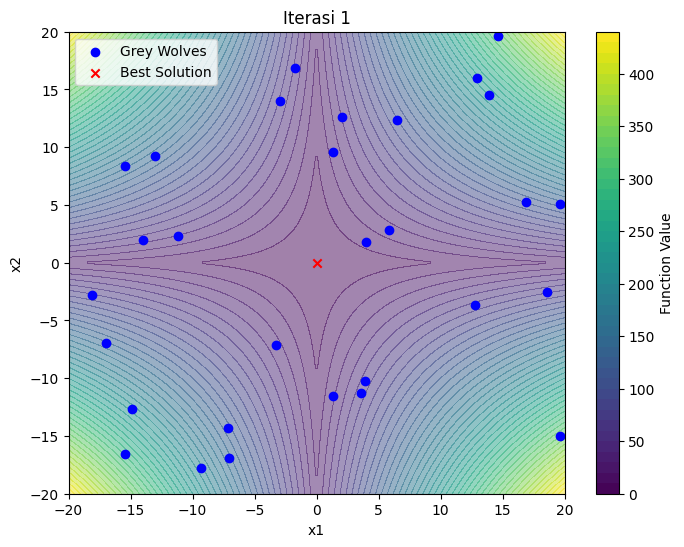

In [ ]:
# Plot hasil running algoritma 1 secara interaktif
# Define range for plotting
x_range = np.linspace(-20, 20, 250)
y_range = np.linspace(-20, 20, 250)
X, Y = np.meshgrid(x_range, y_range)
Z = np.array([[eval(x, y) for x in x_range] for y in y_range])

# Create contour plot
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
fig.colorbar(contour, label='Function Value')
ax.set_title('Grey Wolf Optimization')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# Initialize scatter plot for grey wolves
scat = ax.scatter([], [], color='blue', marker='o', label='Grey Wolves')
best_scat = ax.scatter([], [], color='red', marker='x', label='Best Solution')
ax.legend()

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    ax.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.5)
    pop = all_populations[frame]
    ax.scatter(pop[:, 0], pop[:, 1], color='blue', marker='o', label='Grey Wolves')
    ax.scatter(solusi_gwo[0], solusi_gwo[1], color='red', marker='x', label='Best Solution')
    ax.set_title(f'Iterasi {frame+1}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()

# Create animation
ani = animation.FuncAnimation(fig, update, frames=iterasi_max, interval=500, blit=False)
HTML(ani.to_html5_video())



#### Running algortima 2
**Pemilihan Parameter:**
*   **Jumlah Iterasi** (𝑖𝑡𝑒𝑟𝑎𝑠𝑖_𝑚𝑎𝑥): Dalam kode ini, jumlah iterasi ditetapkan sebesar 100. Jumlah ini dipilih untuk memberikan algoritma cukup waktu untuk melakukan eksplorasi dan eksploitasi dalam ruang pencarian. Jumlah iterasi yang lebih besar mungkin memberikan hasil yang lebih baik, tetapi juga memerlukan waktu komputasi yang lebih lama.
*   **Ukuran Populasi** (𝑝𝑜𝑝𝑢𝑙𝑎𝑠𝑖_𝑠𝑖𝑧𝑒): Ukuran populasi diatur sebesar 30. Pilihan ini didasarkan pada keseimbangan antara keragaman populasi dan waktu komputasi. Populasi yang lebih besar dapat memberikan keragaman yang lebih baik tetapi membutuhkan waktu komputasi yang lebih lama.
*   **Dimensi** (𝑑𝑖𝑚𝑒𝑛𝑠𝑖): Dalam kasus ini, dimensi ruang pencarian diatur menjadi 2, yang sesuai dengan dua variabel keputusan (
𝑥1 dan 𝑥2) dari fungsi objektif F2.
*   **Rentang Pencarian** (𝑟𝑒𝑛𝑡𝑎𝑛𝑔): Rentang pencarian diatur dari -20 hingga 20. Ini memberikan batasan pada ruang pencarian yang masuk akal untuk fungsi F2 yang digunakan.

In [ ]:
# Run algoritma 2

# Parameter algoritma
populasi_size = 30
dimensi = 2
rentang = [-20, 20]
iterasi_max = 100


# Menjalankan algoritma Rao 3
solusi_rao3, score_rao3, all_populations_rao3 = rao3(populasi_size, dimensi, rentang, iterasi_max)
print("Solusi terbaik dengan Rao 3:", solusi_rao3)
print("Fitness Terbaik:", score_rao3)

Solusi terbaik dengan Rao 3: [-0.15024841  0.00871693]
Fitness Terbaik: 0.1602750366553303


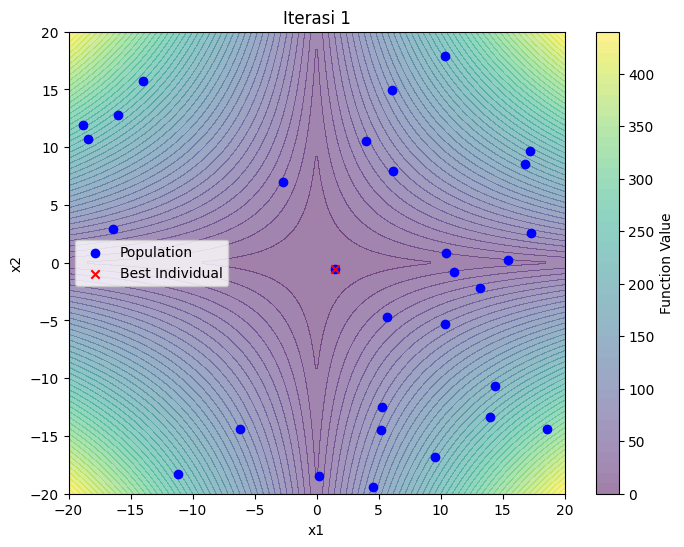

In [ ]:
# Plot hasil running algoritma 2 secara interaktif

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot contour as background
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.5)
fig.colorbar(contour, ax=ax, label='Function Value')
ax.set_title('RAO3 Optimization')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# Initialize scatter plot for RAO3
population_plot = ax.scatter([], [], color='blue', marker='o', label='Population')
best_individual_plot = ax.scatter([], [], color='red', marker='x', label='Best Individual')
ax.legend()

# Define the update function for the animation
def update(frame):
    population_gen = all_populations_rao3[frame]
    population_plot.set_offsets(population_gen)
    fitness_values_gen = hitung_fitness(population_gen)
    best_idx_gen = np.argmin(fitness_values_gen)
    g_best = population_gen[best_idx_gen]
    best_individual_plot.set_offsets(g_best)
    ax.set_title(f'Iterasi {frame+1}')

# Create animation
ani = animation.FuncAnimation(fig, update, frames=iterasi_max, interval=500, blit=False)

# Display the animation
HTML(ani.to_html5_video())

#### Hasil dan Analisis
Berdasarkan hasil dari percobaan kedua algoritma yaitu GWO dan RAO3 dapat dilihat bahwa metode Grey Wolf Optimizer (GWO) memberikan solusi yang jauh lebih baik dibandingkan dengan metode RAO3 dalam menemukan titik minimal dari fungsi F2 benchmark.

Hasil analisis:


*   Berdasarkan Nilai Fitness: GWO mencapai nilai fitness terbaik sebesar 0.0031050550580245854, yang jauh lebih kecil daripada nilai fitness terbaik yang dicapai oleh RAO3 yaitu 0.1602750366553303. Maka, Nilai fitness yang lebih kecil menunjukkan bahwa solusi yang ditemukan lebih dekat dengan titik minimal yang sebenarnya dari fungsi F2 benchmark.

*   Berdasarkan Titik Solusi: GWO menemukan titik solusi terbaik pada [0.00107992, 0.00202295], yang tampaknya sangat dekat dengan titik minimal sebenarnya dari fungsi F2 benchmark. Sedangkan RAO3 menemukan titik solusi terbaik pada [-0.15024841, 0.00871693], yang cukup jauh dari titik minimal sebenarnya.



#### Kesimpulan
Berdasarkan analisis di atas, dapat disimpulkan bahwa metode GWO memberikan performa yang lebih baik dalam menemukan titik minimal dari fungsi F2 benchmark. Solusi yang ditemukan oleh GWO memiliki nilai fitness yang jauh lebih rendah dan titik solusi yang lebih akurat dibandingkan dengan solusi yang ditemukan oleh RAO3.
Dalam kasus ini, metode GWO terbukti lebih efisien dan efektif dalam mencapai solusi optimal untuk masalah optimasi fungsi F2 benchmark.